#### Loading data

In [1]:
suppressPackageStartupMessages(source("../tree_helper.R"))
suppressPackageStartupMessages(library(TreeSummarizedExperiment))
suppressPackageStartupMessages(library(phangorn))

metaData <- read.delim("/fs/cbcb-lab/rob/students/noor/Uncertainity/real_datasets/GSE100505_EDL_MAST/SRR_Acc_List.txt")
quantDir <- "/fs/cbcb-lab/rob/students/noor/Uncertainity/real_datasets/GSE100505_EDL_MAST/sal_out/mode_gcbias=True/posttype=gibbs_npost=100_tf=100"
samples <- metaData$RUN
files <- file.path(quantDir, samples, "quant.sf")
colData <- cbind(data.frame(files = files, names = samples), condition = as.factor(metaData$TissueName))

saveDir <- "../environment/mouseMuscle"
clustFile <- "/fs/cbcb-lab/rob/students/noor/Uncertainity/real_datasets/GSE100505_EDL_MAST/term_out/mode_gcbias=True/posttype=gibbs_npost=100_tf=100/no_threshold0/cluster_nwk.txt"

tseCons <- beaveR::buildTSE(treeTermFile = clustFile, coldata = colData)
treeCons <- rowTree(tseCons)
l <- length(treeCons$tip)

yAll <- beaveR::computeSizeFactors(tseCons)
yAll <- beaveR::scInfReps(yAll)
yAll <- fishpond::labelKeep(yAll)
metadata(yAll)[["infRepsScaled"]] <- TRUE

yTxps <- fishpond::swish(tseCons[1:l,],x="condition")
yInn <- fishpond::swish(tseCons[(l+1):nrow(yAll),],x="condition")

load(file.path(saveDir,  "mehenDiDegNodes.RData"))
load(file.path(saveDir,  "detNodes.RData"))

reading tree

importing quantifications

reading in files with read_tsv

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 


found matching transcriptome:
[ GENCODE - Mus musculus - release M25 ]

loading existing TxDb created: 2023-02-17 18:26:37

Loading required package: GenomicFeatures

Loading required package: AnnotationDbi

loading existing transcript ranges created: 2023-02-17 18:26:39

fetching genome info for GENCODE

Missing txps 2380

Aggregation Started

Aggregation Ended

Setting inf rep depth to mean depth



Progress:   1 on 100Progress:   2 on 100Progress:   3 on 100Progress:   4 on 100Progress:   5 on 100Progress:   6 on 100Progress:   7 on 100Progress:   8 on 100Progress:   9 on 100Progress:  10 on 100Progress:  11 on 100Progress:  12 on 100Progress:  13 on 100Progress:  14 on 100Progress:  15 on 100Progress:  16 on 100Progress:  17 on 100Progress:  18 on 100Progress:  19 on 100Progress:  20 on 100Progress:  21 on 100Progress:  22 on 100Progress:  23 on 100Progress:  24 on 100Progress:  25 on 100Progress:  26 on 100Progress:  27 on 100Progress:  28 on 100Progress:  29 on 100Progress:  30 on 100Progress:  31 on 100Progress:  32 on 100Progress:  33 on 100Progress:  34 on 100Progress:  35 on 100Progress:  36 on 100Progress:  37 on 100Progress:  38 on 100Progress:  39 on 100Progress:  40 on 100Progress:  41 on 100Progress:  42 on 100Progress:  43 on 100Progress:  44 on 100Progress:  45 on 100Progress:  46 on 100Progress:  47 on 100Progress:  48 on 100Progress:  49 on 100Progress:  50 on 100

### Plotting the trenDi nodes that map to DEGs but dont contain a single DET
We use plot gardener

#### Preparing data for plot gardener

In [2]:
library(org.Mm.eg.db)
library(TxDb.Mmusculus.UCSC.mm10.knownGene) ## this one corresponds to the version we need
suppressPackageStartupMessages(library(plotgardener))
suppressPackageStartupMessages(library(plyranges))
suppressPackageStartupMessages(library(ggtree))
suppressPackageStartupMessages(library("grid"))
suppressPackageStartupMessages(library("ggplotify"))
suppressPackageStartupMessages(library("ggplot2"))
suppressPackageStartupMessages(library("ggpubr"))

txdb <- TxDb.Mmusculus.UCSC.mm10.knownGene
txpMouse <- transcripts(txdb)

txpMouse <- txpMouse %>%
  mutate(tx_id = as.character(tx_id))

txpMouse <- txpMouse %>%
  mutate(gene_id = mapIds(
           txdb, keys=tx_id,
           column="GENEID", keytype="TXID")
         ) %>%
  filter(!is.na(gene_id))
txpMouse <- txpMouse %>%
  mutate(ensID = mapIds(
           org.Mm.eg.db, keys=gene_id,
           column="ENSEMBL", keytype="ENTREZID")
         ) %>%
  filter(!is.na(ensID))
txpMouse <- txpMouse %>%
                filter(tx_name %in% intersect(treeCons$tip, mcols(txpMouse)[["tx_name"]]))


genesMouse <- genes(txdb)
genesMouse <- genesMouse %>%
  mutate(ensID = mapIds(org.Mm.eg.db, 
                            gene_id, "ENSEMBL", "ENTREZID")) %>% 
    filter(!is.na(ensID))



'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:many mapping between keys and columns

  66 genes were dropped because they have exons located on both strands
  of the same reference sequence or on more than one reference sequence,
  so cannot be represented by a single genomic range.
  Use 'single.strand.genes.only=FALSE' to get all the genes in a
  GRangesList object, or use suppressMessages() to suppress this message.

'select()' returned 1:many mapping between keys and columns



In [3]:
suppressPackageStartupMessages(source("../tree_helper.R"))

In [4]:
colnames(colData(yAll))[2] <- "Muscle"

#### Plots

In [216]:
mehenDiNodes <- detNodes[["mehenDi"]]

[1] "ENSMUST00000120135.7" "ENSMUST00000055087.6"

Phylogenetic tree with 5 tips and 4 internal nodes.

Tip labels:
  ENSMUST00000120135.7, ENSMUST00000055087.6, ENSMUST00000118756.7, ENSMUST00000140339.1, ENSMUST00000150672.1
Node labels:
  Node169984, Node169985, Node169986, Node169987

Rooted; includes branch lengths.
[1] "Genes ENSMUSG00000021457"
              tx_name1               tx_name2               tx_name3 
"ENSMUST00000120135.7" "ENSMUST00000118756.7" "ENSMUST00000150672.1" 
              tx_name4               tx_name5 
"ENSMUST00000055087.6" "ENSMUST00000140339.1" 
[1] "ENSMUST00000120135.7" "ENSMUST00000055087.6" "ENSMUST00000118756.7"
[4] "ENSMUST00000140339.1" "ENSMUST00000150672.1"
[1] TRUE
[1] TRUE


legend[legend1]

text[text1]

text[text2]

transcripts[transcripts1]

genomeLabel[genomeLabel1]

text[text2]

Warning message:
"Removed 1 row containing missing values or values outside the scale range (`geom_text()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range (`geom_segment()`)."
gg[gg1]

text[text2]

gg[gg2]

text[text2]

gg[gg3]



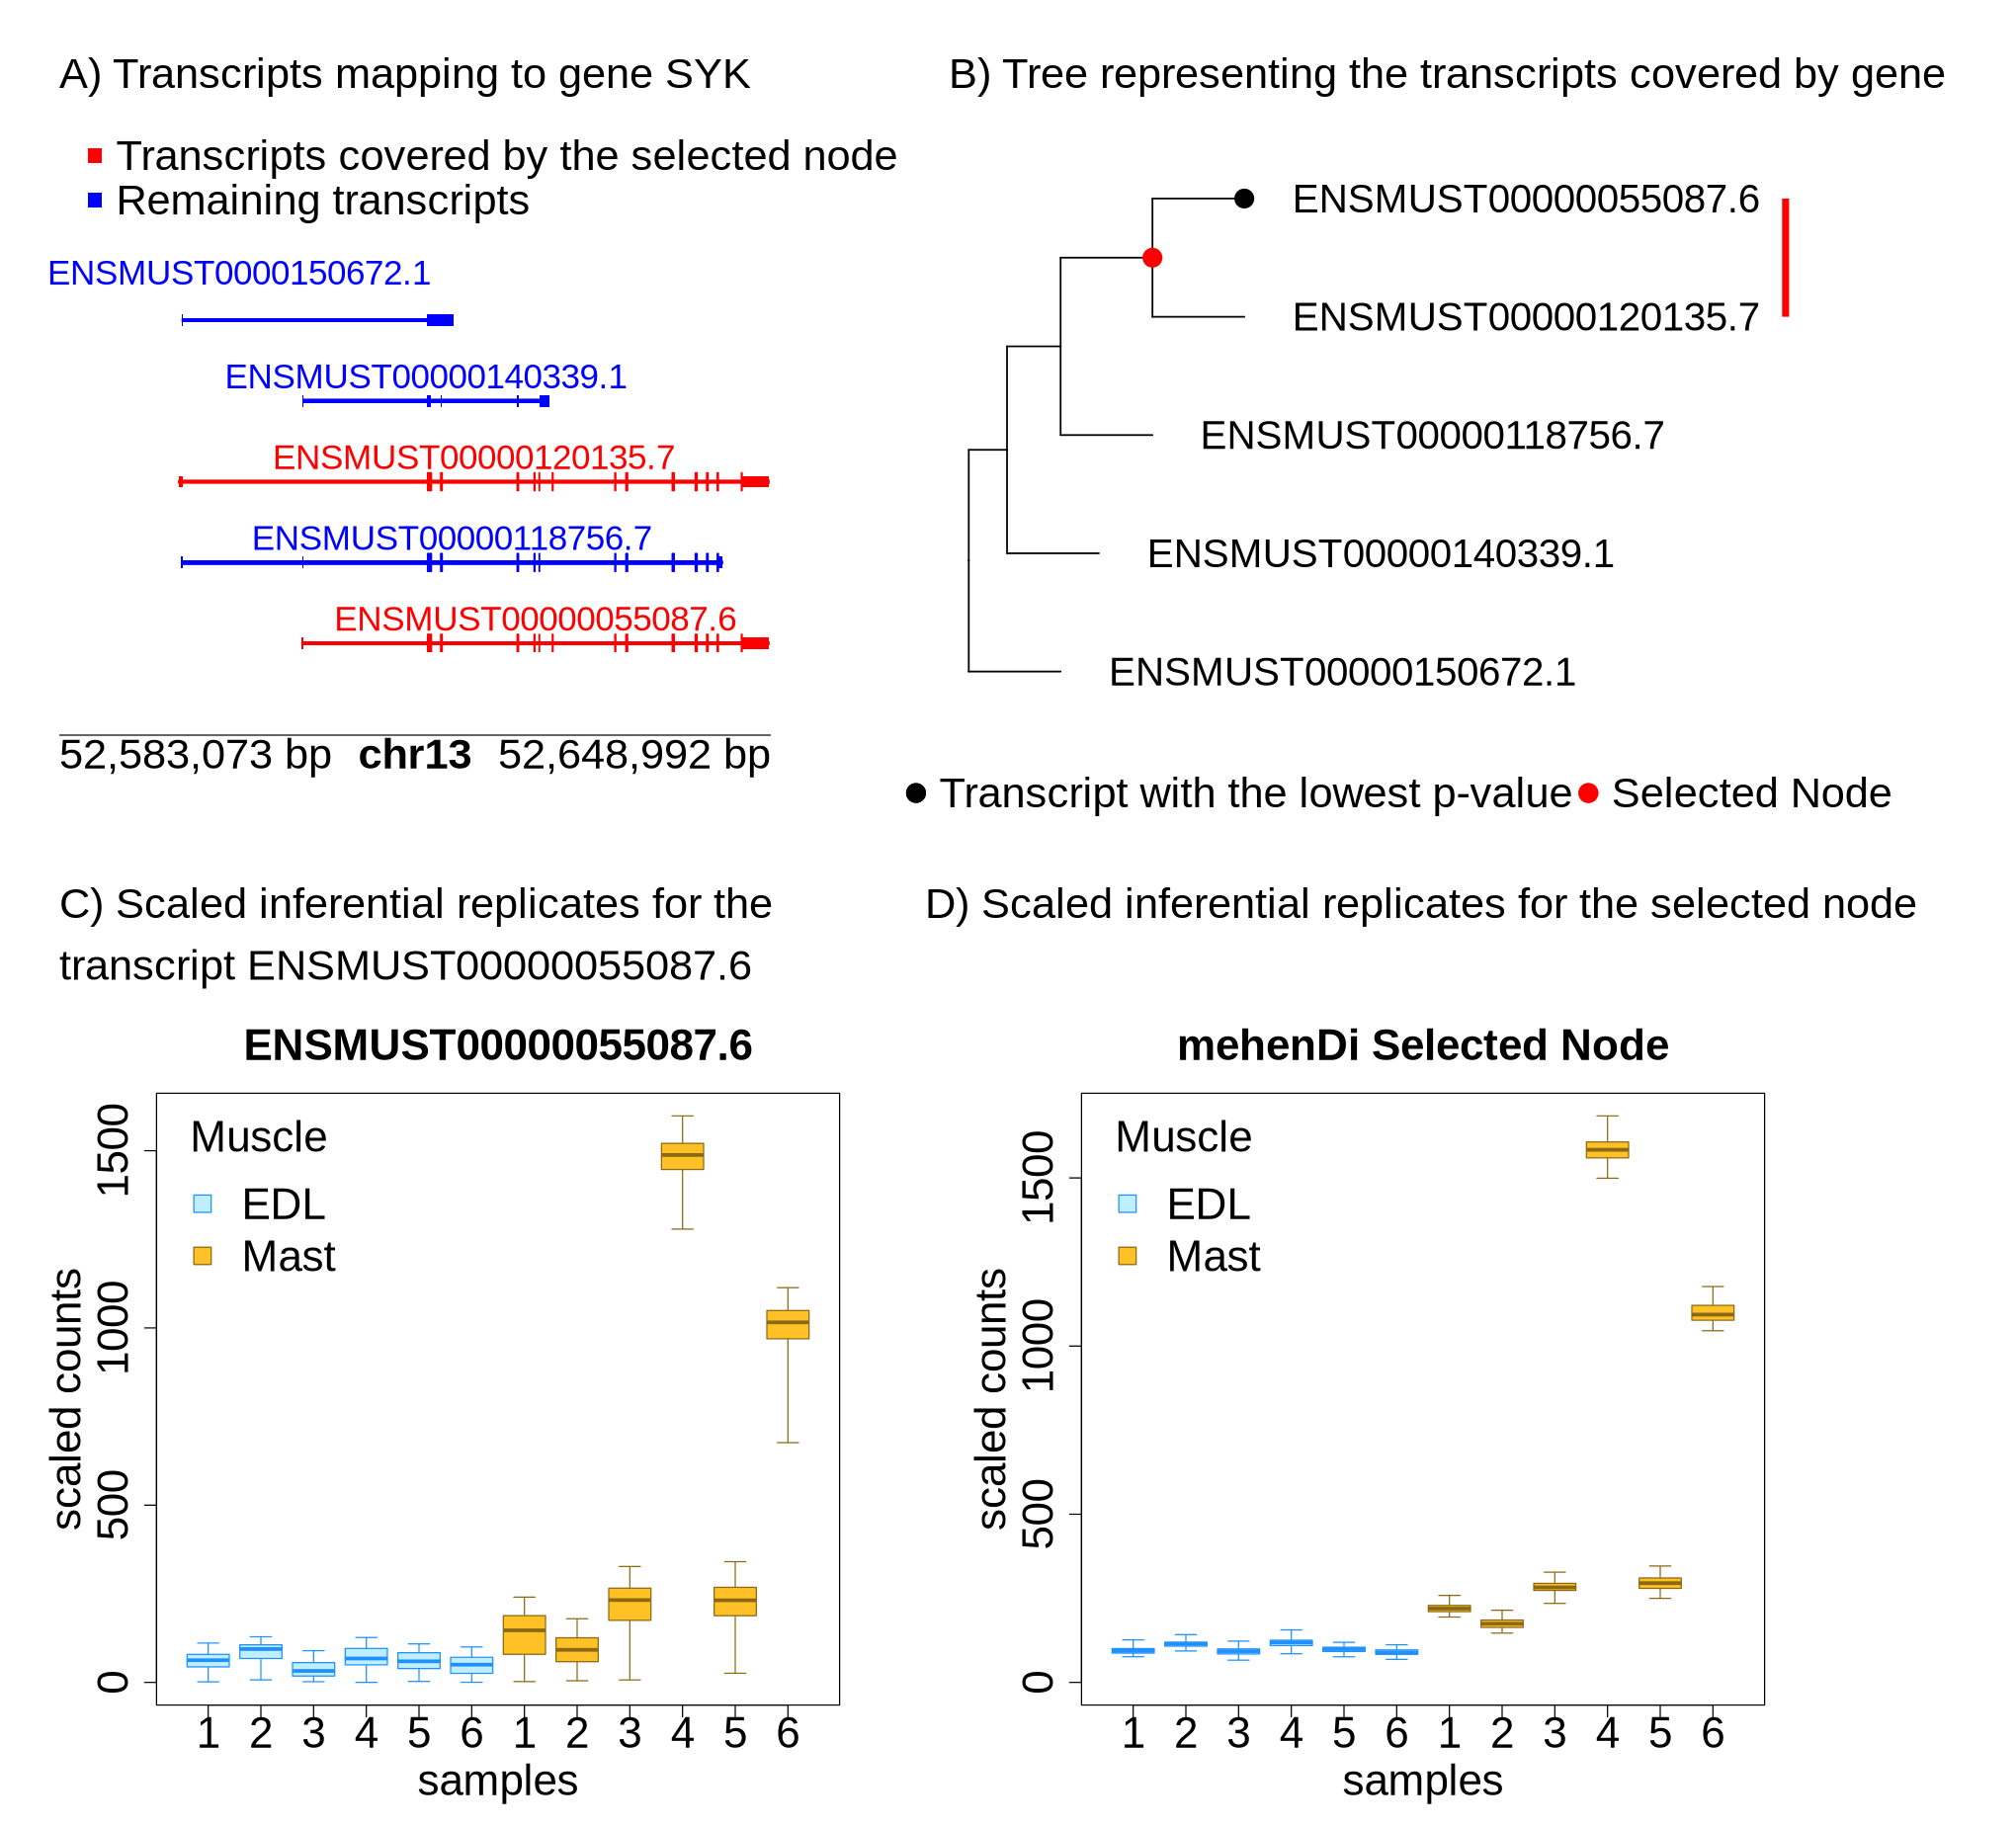

In [219]:
i <- 1
j <- 283
cex <- 2.2
size <- 21
tt <- extPreInf(tseCons, yTxps, mehenDiNodes, mehenDiDegNodes, txpMouse, genesMouse, i, j)
pI <- plotIReps(yAll, tt$txpMin, tt$iNode, x="Muscle", lp="left", cex=cex)
pTree <- plotTree(tt$tSub, 9, tt$minTInd, of=70, xlim=110, size=size+5,tip.size = 8.5)
pgs <- parF(tt$g, tt$txShow, tt$tSub, fs=size)

options(repr.plot.width=17, repr.plot.height=15.4)
library(plotgardener)
pageCreate(width = 17, height = 15.4, showGuides = FALSE, default.units = "inches")
par <- pgs[[1]]

parText <- pgParams(
    just = c("left", "top"), fontsize = size+5
)#, fontface = "bold")
parText2 <- pgParams(
    just = c("left", "top"), fontsize = size, fontcolor="blue"
)#, fontface = "bold")

hilite <- pgs[[2]]
plotLegend(
    legend = c("Transcripts covered by the selected node", "Remaining transcripts"),
    fill = c("red", "blue"), border = FALSE,
    x = 0.5, y = 1, width = 1, height = 1,
    just = c("left", "top"), fontsize=size+5,
)
plotText(label="A) Transcripts mapping to gene SYK", x = 0.5, y = 0.5,
        params = parText)

plotText(label="ENSMUST0000150672.1", 
         x = 0.4, y = 2.2, params = parText2)

plotTranscripts(
    params = par, x = 1.5, y = 5.5, width = 5, height = 8.5, 
    spaceHeight=2.5, boxHeight=0.15,
    labels = "transcript", fill="blue", 
    transcriptHighlights = hilite
)

plotGenomeLabel(
  params = par, x = 0.5, y = 6.2, length=6,
  just = c("left", "top"), fontsize=size+5
)


plotText(label="B) Tree representing the transcripts covered by gene\n SYK", 
         x = 8, y = 0.5, params = parText)
plotGG(
    plot = pTree,
    x = 7.7, y =1, width = 8, height=6
)

plotText(label="C) Scaled inferential replicates for the \ntranscript ENSMUST00000055087.6", 
         x = 0.5, y = 7.5, params = parText)

plotGG(
    plot = pI[[1]],
    x = 0.5, y = 8.4, width = 7, height=7
)

plotText(label="D) Scaled inferential replicates for the selected node", 
         x = 7.8, y = 7.5, params = parText)

plotGG(
    plot = pI[[2]],
    x = 8.3, y = 8.4, width = 7, height=7
)

[1] "ENSMUST00000089338.5" "ENSMUST00000171503.7"

Phylogenetic tree with 3 tips and 2 internal nodes.

Tip labels:
  ENSMUST00000089338.5, ENSMUST00000171503.7, ENSMUST00000169113.1
Node labels:
  Node103071, Node103072

Rooted; includes branch lengths.
[1] "Genes ENSMUSG00000034623"
              tx_name1               tx_name2               tx_name3 
"ENSMUST00000171503.7" "ENSMUST00000089338.5" "ENSMUST00000169113.1" 
[1] "ENSMUST00000089338.5" "ENSMUST00000171503.7" "ENSMUST00000169113.1"
[1] TRUE
[1] TRUE


legend[legend1]

text[text1]

transcripts[transcripts1]

text[text2]

text[text2]

genomeLabel[genomeLabel1]

text[text2]

gg[gg1]

text[text2]

gg[gg2]

text[text2]

gg[gg3]



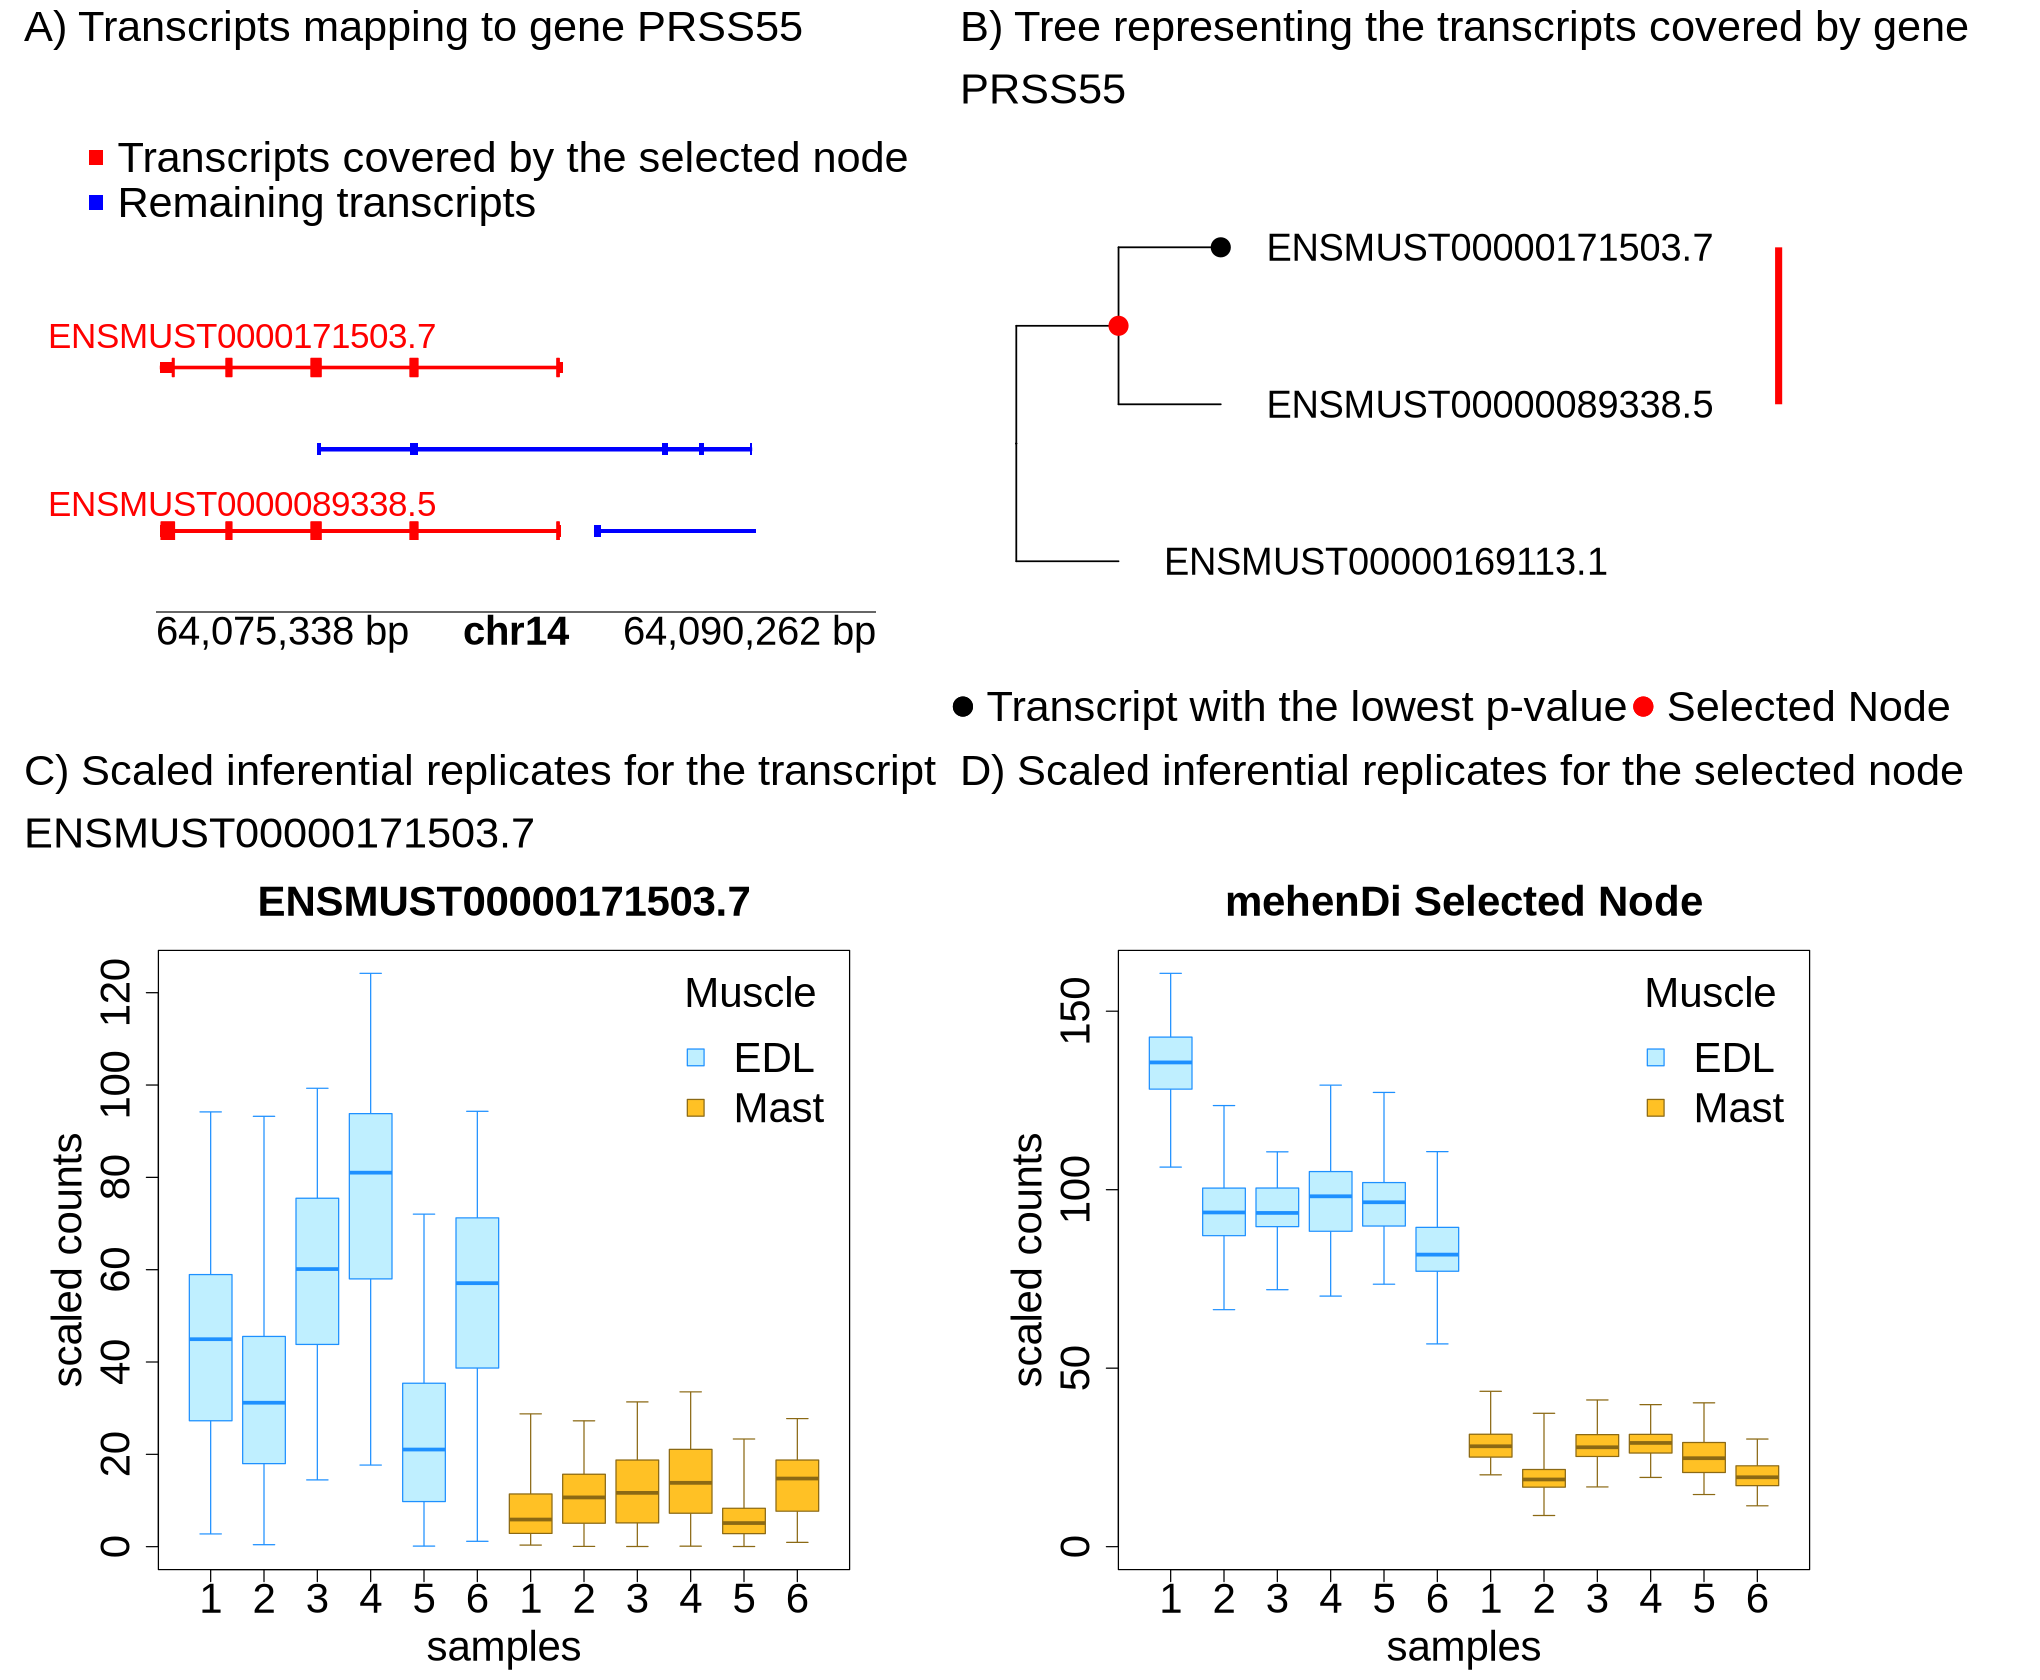

In [210]:
options(repr.plot.width=17, repr.plot.height=14)
i <- 1
j <- 17
cex <- 2.1
size <- 21
tt <- extPreInf(tseCons, yTxps, mehenDiNodes, mehenDiDegNodes, txpMouse, genesMouse, i, j)
pI <- plotIReps(yAll, tt$txpMin, tt$iNode, lp="right", x="Muscle", cex=cex)
pTree <- plotTree(tt$tSub, 5, tt$minTInd, of=65, xlim=100, size=size+5, tip.size = 8)
pgs <- parF(tt$g, tt$txShow, tt$tSub, chromSt = 100, chromEnd = 100,fs=size+5)

library(plotgardener)
pageCreate(width = 17, height = 14, showGuides = FALSE, default.units = "inches")
par <- pgs[[1]]

parText <- pgParams(
    just = c("left", "top"), fontsize = size+5
)#, fontface = "bold")

parText2 <- pgParams(
    just = c("left", "top"), fontsize = size, fontcolor="red"
)

parTxp  <- pgParams(
    fontsize = size,
    fontcolor="blue"
)

hilite <- pgs[[2]]
plotLegend(
    legend = c("Transcripts covered by the selected node", "Remaining transcripts"),
    fill = c("red", "blue"), border = FALSE,
    x = 0.5, y = 1, width = 1, height = 1,
    just = c("left", "top"), fontsize=size+5,
)
plotText(label="A) Transcripts mapping to gene PRSS55", x = 0.2, y = 0.1,
        params = parText)

plotTranscripts(
    params = par, x = 1.3, y = 4.5, width = 5, height = 8.5, 
    spaceHeight=2.5, boxHeight=0.15,
    labels = "transcript", fill="blue", 
    transcriptHighlights = hilite
)

plotText(label="ENSMUST0000171503.7", 
         x = 0.4, y = 2.7, params = parText2)
plotText(label="ENSMUST0000089338.5", 
         x = 0.4, y = 4.1, params = parText2)

plotGenomeLabel(
  params = par, x = 1.3, y = 5.1, length=6,
  just = c("left", "top"), fontsize=size+3
)

plotText(label="B) Tree representing the transcripts covered by gene\nPRSS55", 
         x = 8, y = 0.1, params = parText)
plotGG(
    plot = pTree,
    x = 8, y = 1.2, width = 8, height=5
)

plotText(label="C) Scaled inferential replicates for the transcript \nENSMUST00000171503.7", 
         x = 0.2, y = 6.3, params = parText)

plotGG(
    plot = pI[[1]],
    x = 0.5, y = 7.1, width = 7, height=7
)

plotText(label="D) Scaled inferential replicates for the selected node", 
         x = 8, y = 6.3, params = parText)

plotGG(
    plot = pI[[2]],
    x = 8.5, y = 7.1, width = 7, height=7
)

[1] "ENSMUST00000141294.1" "ENSMUST00000142448.7" "ENSMUST00000138821.7"

Phylogenetic tree with 6 tips and 5 internal nodes.

Tip labels:
  ENSMUST00000130375.1, ENSMUST00000226996.1, ENSMUST00000113532.8, ENSMUST00000141294.1, ENSMUST00000142448.7, ENSMUST00000138821.7
Node labels:
  Node150750, Node150751, Node150752, Node150753, Node150754

Rooted; includes branch lengths.
[1] "Genes ENSMUSG00000055632"
              tx_name1               tx_name2               tx_name3 
"ENSMUST00000113532.8" "ENSMUST00000226996.1" "ENSMUST00000130375.1" 
              tx_name4               tx_name5               tx_name6 
"ENSMUST00000138821.7" "ENSMUST00000142448.7" "ENSMUST00000141294.1" 
[1] "ENSMUST00000130375.1" "ENSMUST00000226996.1" "ENSMUST00000113532.8"
[4] "ENSMUST00000141294.1" "ENSMUST00000142448.7" "ENSMUST00000138821.7"
[1] TRUE
[1] TRUE


legend[legend1]

text[text1]

transcripts[transcripts1]

text[text2]

text[text2]

text[text2]

genomeLabel[genomeLabel1]

text[text2]

gg[gg1]

text[text2]

gg[gg2]

text[text2]

gg[gg3]



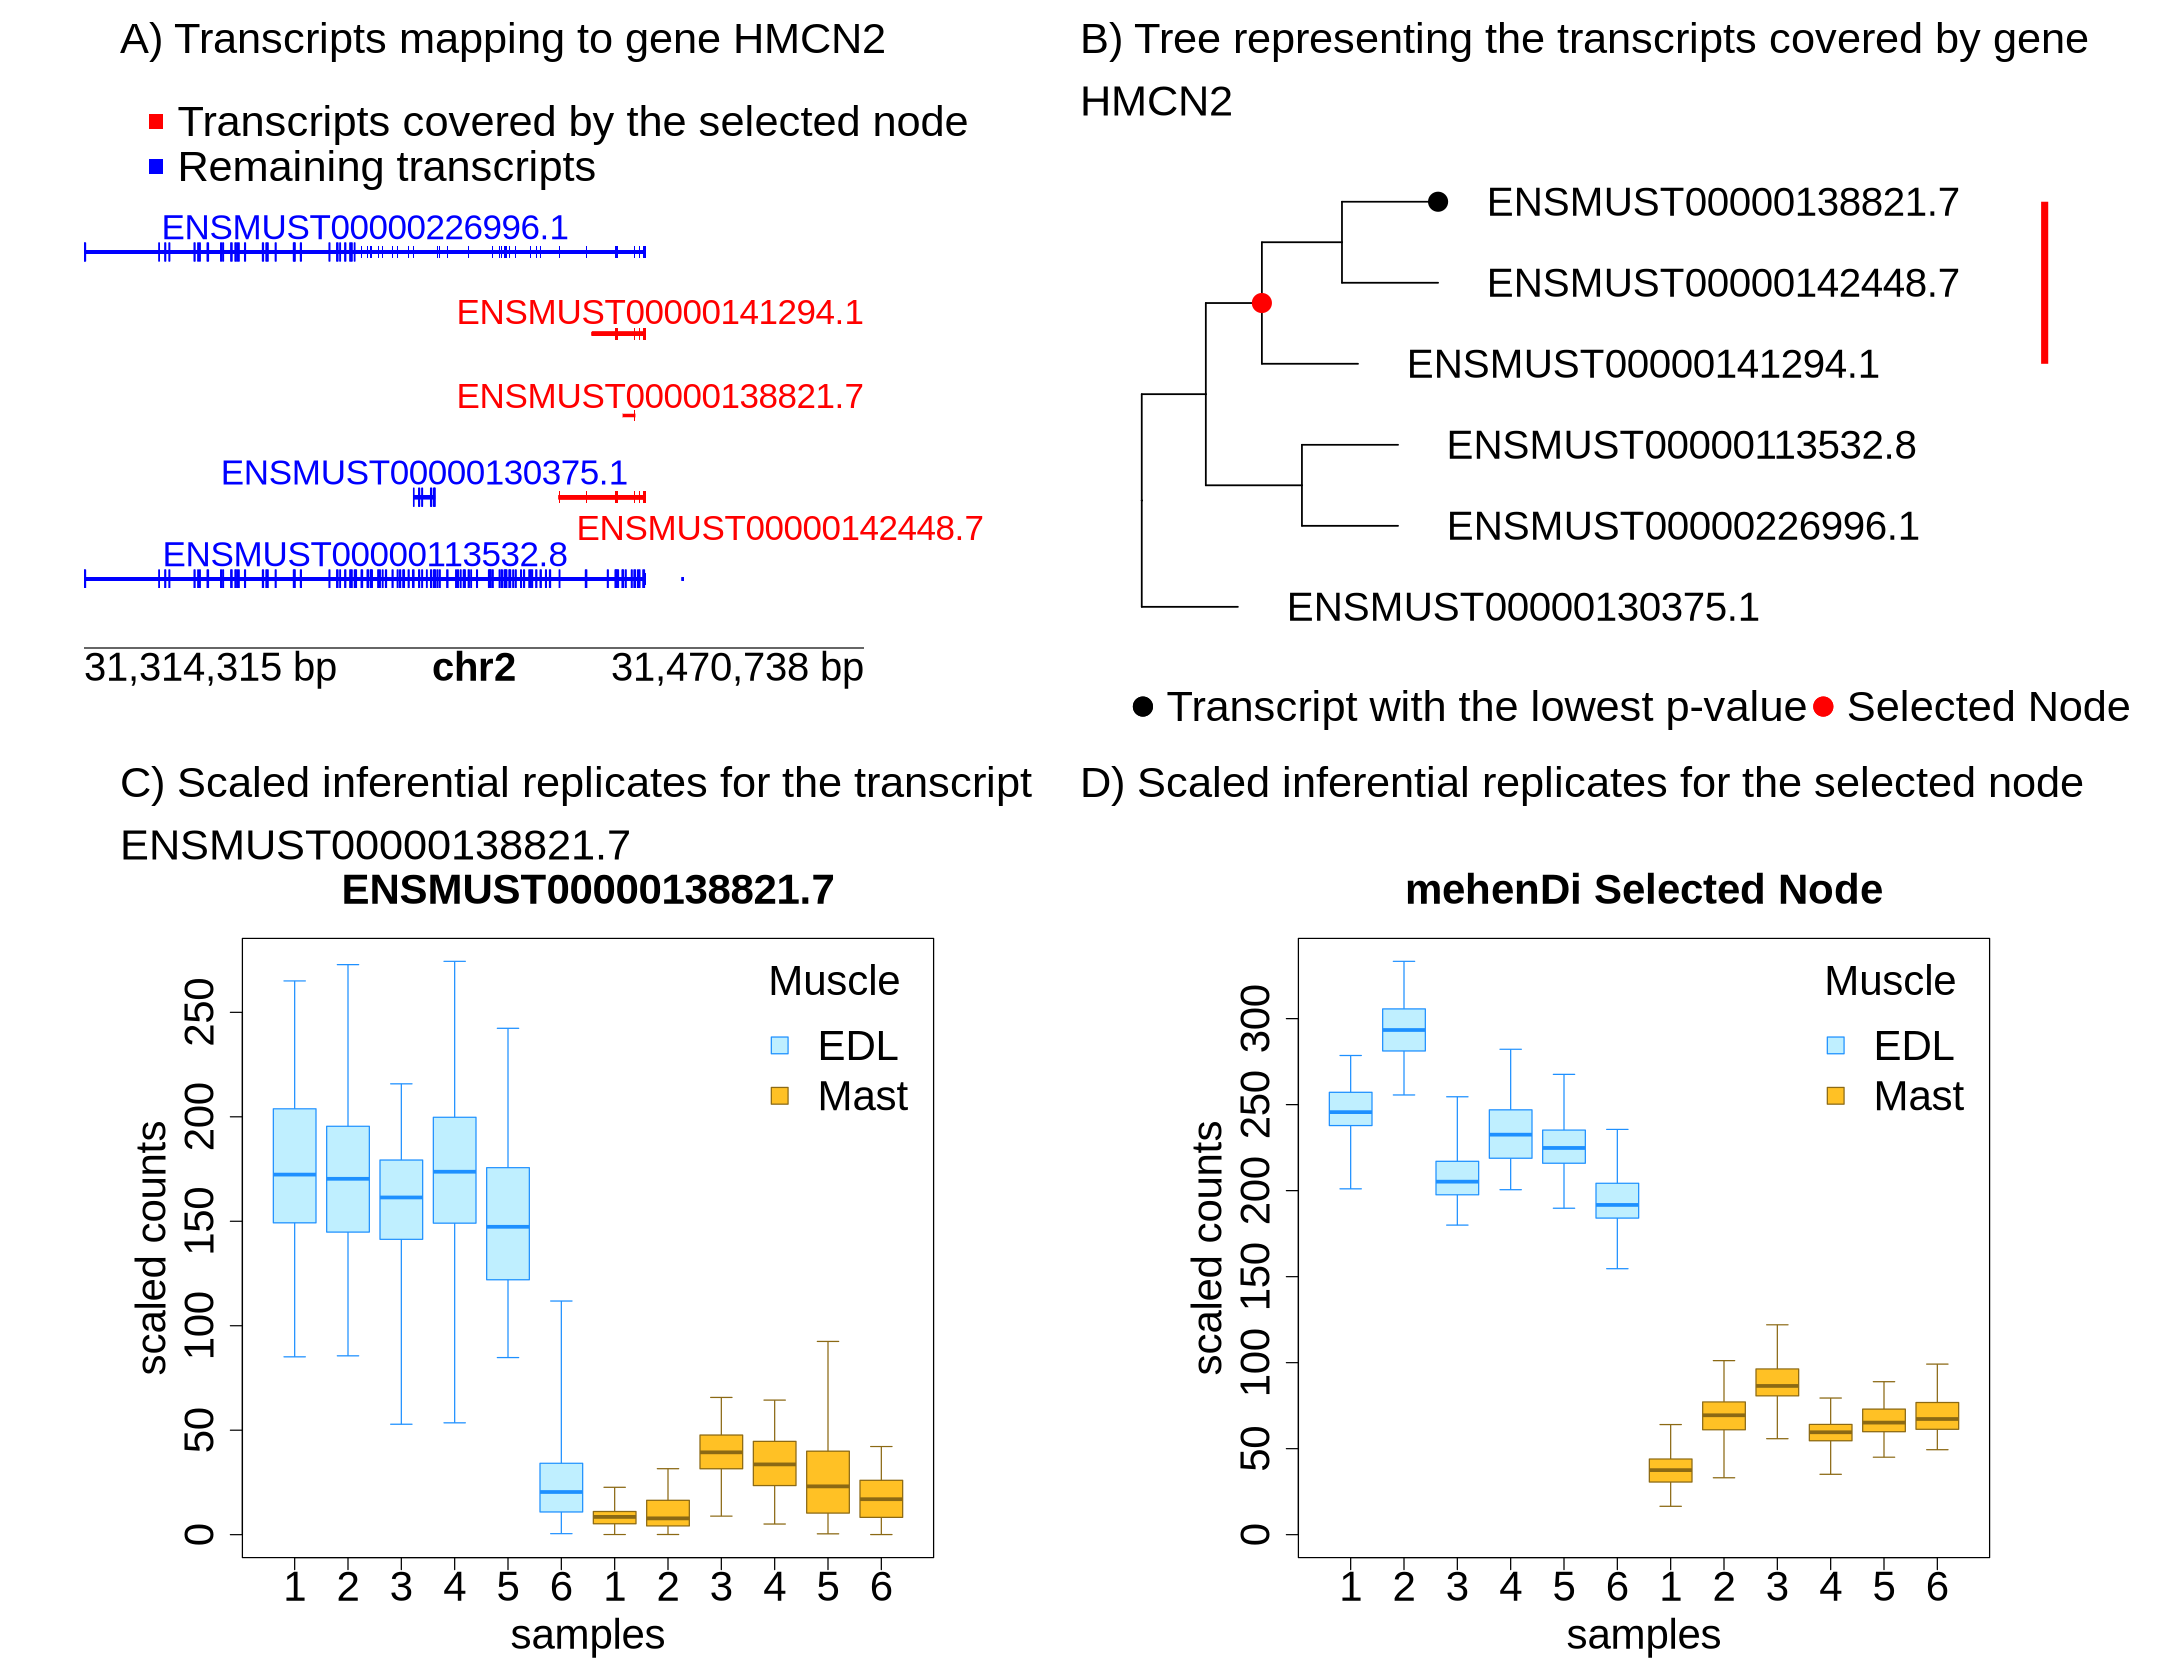

In [211]:
options(repr.plot.width=18, repr.plot.height=14)
i <- 1
j <- 206
cex <- 2.1
size <- 21
tt <- extPreInf(tseCons, yTxps, mehenDiNodes, mehenDiDegNodes, txpMouse, genesMouse, i, j)
pI <- plotIReps(yAll, tt$txpMin, tt$iNode, lp="right", x="Muscle", cex = cex)
pTree <- plotTree(tt$tSub, 10, tt$minTInd, of=75, xlim=120, size = size+5, tip.size=8.5)
pgs <- parF(tt$g, tt$txShow, tt$tSub, chromSt = 100, chromEnd = 10000,fs=size)

library(plotgardener)
pageCreate(width = 18, height = 14, showGuides = FALSE, default.units = "inches")
par <- pgs[[1]]

parText <- pgParams(
    just = c("left", "top"), fontsize = size+5
)#, fontface = "bold")
parTxp  <- pgParams(
    fontsize = size,
    fontcolor="red"
)

hilite <- pgs[[2]]
plotLegend(
    legend = c("Transcripts covered by the selected node", "Remaining transcripts"),
    fill = c("red", "blue"), border = FALSE,
    x = 1, y = 0.7, width = 1, height = 1,
    just = c("left", "top"), fontsize=size+5,
)
plotText(label="A) Transcripts mapping to gene HMCN2", x = 1, y = 0.2,
        params = parText)

plotTranscripts(
    params = par, x = 0.7, y = 4.9, width = 5, height = 8.5, 
    spaceHeight=2.5, boxHeight=0.15,
    labels = "transcript", fill="blue", 
    transcriptHighlights = hilite
)
   
plotText(label="ENSMUST00000138821.7", x = 5.5, y = 3.3,
        params = parTxp)
plotText(label="ENSMUST00000142448.7", x = 6.5, y = 4.4,
        params = parTxp)
plotText(label="ENSMUST00000141294.1", x = 5.5, y = 2.6,
        params = parTxp)

plotGenomeLabel(
  params = par, x = 0.7, y = 5.4, length=6.5,
  just = c("left", "top"), fontsize=size+3
)

plotText(label="B) Tree representing the transcripts covered by gene \nHMCN2", 
         x = 9, y = 0.2, params = parText)
plotGG(
    plot = pTree,
    x = 9, y = 1.2, width = 9, height=5
)

plotText(label="C) Scaled inferential replicates for the transcript \nENSMUST00000138821.7", 
         x = 1, y = 6.4, params = parText)

plotGG(
    plot = pI[[1]],
    x = 1.2, y = 7, width = 7, height=7
)

plotText(label="D) Scaled inferential replicates for the selected node", 
         x = 9, y = 6.4, params = parText)

plotGG(
    plot = pI[[2]],
    x = 10, y = 7, width = 7, height=7
)

[1] "ENSMUST00000210192.1"  "ENSMUST00000032927.13" "ENSMUST00000164479.8" 
[4] "ENSMUST00000167888.8" 

Phylogenetic tree with 11 tips and 10 internal nodes.

Tip labels:
  ENSMUST00000210192.1, ENSMUST00000032927.13, ENSMUST00000164479.8, ENSMUST00000167888.8, ENSMUST00000174291.7, ENSMUST00000174140.1, ...
Node labels:
  Node104097, Node104098, Node104099, Node104100, Node104101, Node104102, ...

Rooted; includes branch lengths.
[1] "Genes ENSMUSG00000030688"
               tx_name1                tx_name2                tx_name3 
 "ENSMUST00000163799.8"  "ENSMUST00000164479.8" "ENSMUST00000032927.13" 
               tx_name4                tx_name5                tx_name6 
 "ENSMUST00000210192.1"  "ENSMUST00000172630.7"  "ENSMUST00000174291.7" 
               tx_name7                tx_name8                tx_name9 
 "ENSMUST00000167888.8"  "ENSMUST00000173270.7"  "ENSMUST00000174083.1" 
              tx_name10 
 "ENSMUST00000174140.1" 
 [1] "ENSMUST00000210192.1"  "ENSMUST00000032

legend[legend1]

text[text1]

transcripts[transcripts1]

text[text2]

genomeLabel[genomeLabel1]

text[text2]

Warning message:
"Removed 1 row containing missing values or values outside the scale range (`geom_text()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range (`geom_text()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range (`geom_segment()`)."
gg[gg1]

text[text2]

gg[gg2]

text[text2]

gg[gg3]



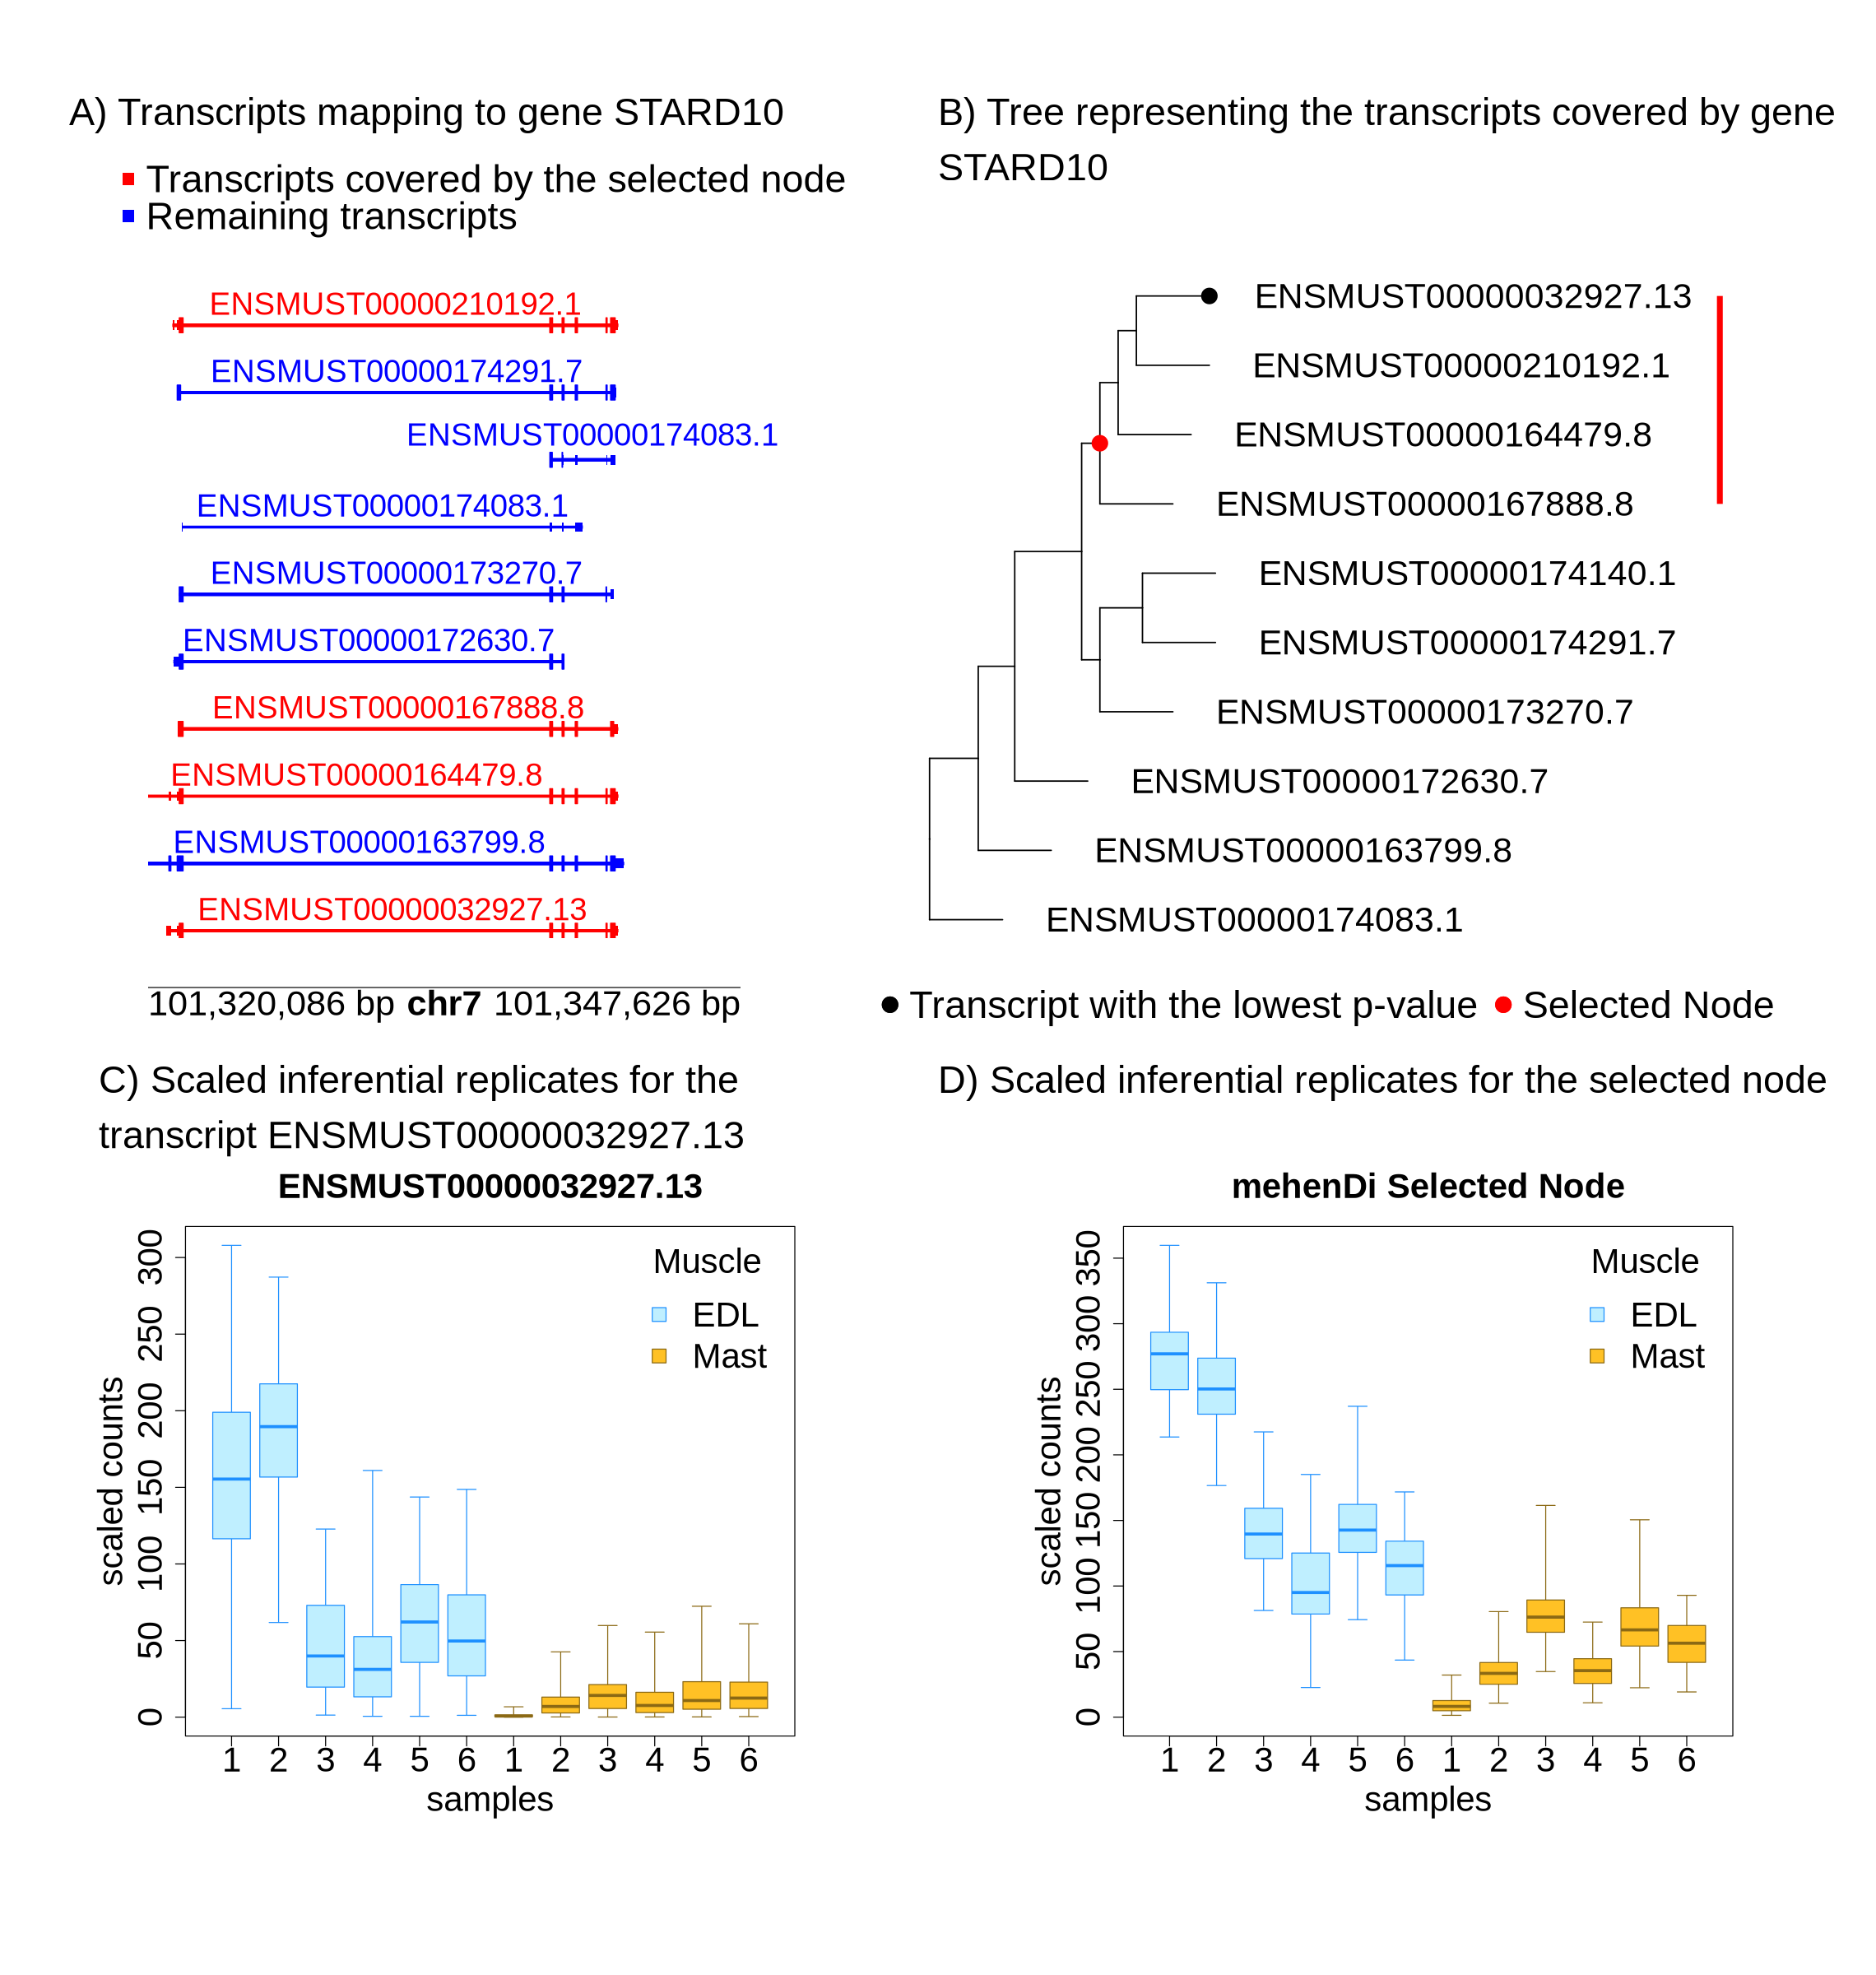

In [212]:
options(repr.plot.width=19, repr.plot.height=20)
i <- 1
j <- 21
cex <- 2.1
size <- 23
tt <- extPreInf(tseCons, yTxps, mehenDiNodes, mehenDiDegNodes, txpMouse, genesMouse, i, j)
tt$tSub <- drop.tip(tt$tSub,
         setdiff(tt$tSub$tip.label, txpMouse %>% 
                 filter(ensID=="ENSMUSG00000030688") %>%
                 data.frame  %>% select(tx_name) %>% unlist))
pI <- plotIReps(yAll, tt$txpMin, tt$iNode, lp="right",x="Muscle",cex=cex)
pTree <- plotTree(tt$tSub, 15, tt$minTInd, of=83, xlim=130,size = size+5, tip.size = 9)
pgs <- parF(tt$g, tt$txShow, tt$tSub, chromSt = -3000, chromEnd=1000,fs=size)
parTxp  <- pgParams(
    fontsize = size,
    fontcolor="blue"
)

library(plotgardener)
pageCreate(width = 18, height = 19, showGuides = FALSE, default.units = "inches")
par <- pgs[[1]]

parText <- pgParams(
    just = c("left", "top"), fontsize = size+5
)#, fontface = "bold")

hilite <- pgs[[2]]
plotLegend(
    legend = c("Transcripts covered by the selected node", "Remaining transcripts"),
    fill = c("red", "blue"), border = FALSE,
    x = 0.5, y = 1, width = 1, height = 1,
    just = c("left", "top"), fontsize=size+5,
)
plotText(label="A) Transcripts mapping to gene STARD10", x = 0.2, y = 0.5,
        params = parText)

plotTranscripts(
    params = par, x = 1, y = 9, width = 5, height = 7, 
    spaceHeight=2.5, boxHeight=0.15,
    labels = "transcript", fill="blue", 
    transcriptHighlights = hilite
)

plotText(label="ENSMUST00000174083.1", x = 5.5, y = 3.9,
        params = parTxp)

plotGenomeLabel(
  params = par, x = 1, y = 9.5, length=6,
  just = c("left", "top"), fontsize=size+3
)

plotText(label="B) Tree representing the transcripts covered by gene \nSTARD10", 
         x = 9, y = 0.5, params = parText)
plotGG(
    plot = pTree,
    x = 8.4, y = 2, width = 9, height=8
)

plotText(label="C) Scaled inferential replicates for the \ntranscript ENSMUST00000032927.13", 
         x = 0.5, y = 10.3, params = parText)

plotGG(
    plot = pI[[1]],
    x = 0.5, y = 11.1, width = 7.5, height=7
)

plotText(label="D) Scaled inferential replicates for the selected node", 
         x = 9, y = 10.3, params = parText)

plotGG(
    plot = pI[[2]],
    x = 10, y = 11.1, width = 7.5, height=7

)

In [213]:
options(repr.plot.width=19, repr.plot.height=18)

i <- 1
j <- 72
cex <- 2.1
size <- 24

tt <- extPreInf(tseCons, yTxps, mehenDiNodes, mehenDiDegNodes, txpMouse, genesMouse, i, j)
pI <- plotIReps(yAll, tt$txpMin, tt$iNode, lp="left", cex=cex, x = "Muscle")
pTree <- plotTree(tt$tSub, 13, tt$minTInd, of=40, xlim=100, size=size+5, tip.size = 8)
pgs <- parF(tt$g, tt$txShow, tt$tSub, chromSt = 100, chromEnd = 10000,fs=size)

parTxp  <- pgParams(
    fontsize = size,
    fontcolor="blue"
)

library(plotgardener)
pdf("../images/mouse/Figure8.pdf", width = 19, height = 18)
pageCreate(width = 19, height = 18, showGuides = FALSE, default.units = "inches")
par <- pgs[[1]]

parText <- pgParams(
    just = c("left", "top"), fontsize = size+5
)#, fontface = "bold")

hilite <- pgs[[2]]
plotLegend(
    legend = c("Transcripts covered by the selected node", "Remaining transcripts"),
    fill = c("red", "blue"), border = FALSE,
    x = 0.5, y = 0.5, width = 1, height = 1,
    just = c("left", "top"), fontsize=size+5,
)
plotText(label="A) Transcripts mapping to gene PRRG1", x = 0.5, y = 0.1,
        params = parText)

plotTranscripts(
    params = par, x = 1, y = 8.5, width = 6, height = 7, 
    spaceHeight=2.5, boxHeight=0.15,
    labels = "transcript", fill="blue", 
    transcriptHighlights = hilite
)

plotText(label="ENSMUST00000148345.7", x = 5.5, y = 2.7,
        params = parTxp)

plotText(label="ENSMUST00000132852.7", x = 5.5, y = 2.1,
        params = parTxp)

plotText(label="ENSMUST00000137011.1", x = 5.5, y = 5.5,
        params = parTxp)

plotGenomeLabel(
  params = par, x = 1, y = 8.8, length=7,
  just = c("left", "top"), fontsize=size+3
)

plotText(label="B) Tree representing the transcripts covered by gene\n PRRG1", 
         x = 9, y = 0.1, params = parText)
plotGG(
    plot = pTree,
    x = 8, y =1, width = 12, height=8
)

plotText(label="C) Scaled inferential replicates for the \ntranscript ENSMUST00000177904.7", 
         x = 0.5, y = 9.5, params = parText)

plotGG(
    plot = pI[[1]],
    x = 0.5, y = 10.3, width = 8, height=8
)

plotText(label="D) Scaled inferential replicates for the selected node", 
         x = 9, y = 9.5, params = parText)

plotGG(
    plot = pI[[2]],
    x = 10, y = 10.3, width = 8, height=8
)
dev.off()

[1] "ENSMUST00000114025.7" "ENSMUST00000177904.7" "ENSMUST00000114024.8"

Phylogenetic tree with 8 tips and 7 internal nodes.

Tip labels:
  ENSMUST00000134602.7, ENSMUST00000114025.7, ENSMUST00000177904.7, ENSMUST00000114024.8, ENSMUST00000126209.7, ENSMUST00000156427.1, ...
Node labels:
  Node116381, Node116382, Node116383, Node116384, Node116385, Node116386, ...

Rooted; includes branch lengths.
[1] "Genes ENSMUSG00000047996"
              tx_name1               tx_name2               tx_name3 
"ENSMUST00000177904.7" "ENSMUST00000114025.7" "ENSMUST00000114024.8" 
              tx_name4               tx_name5               tx_name6 
"ENSMUST00000126209.7" "ENSMUST00000126994.7" "ENSMUST00000156427.1" 
              tx_name7               tx_name8 
"ENSMUST00000134602.7" "ENSMUST00000132852.7" 
[1] "ENSMUST00000134602.7" "ENSMUST00000114025.7" "ENSMUST00000177904.7"
[4] "ENSMUST00000114024.8" "ENSMUST00000126209.7" "ENSMUST00000156427.1"
[7] "ENSMUST00000126994.7" "ENSMUST00000132852.

legend[legend1]

text[text1]

transcripts[transcripts1]

text[text2]

text[text2]

text[text2]

genomeLabel[genomeLabel1]

text[text2]

gg[gg1]

text[text2]

gg[gg2]

text[text2]

gg[gg3]



png 
  2

[1] "ENSMUST00000132328.7" "ENSMUST00000151906.7"

Phylogenetic tree with 8 tips and 7 internal nodes.

Tip labels:
  ENSMUST00000132328.7, ENSMUST00000151906.7, ENSMUST00000062821.12, ENSMUST00000163299.7, ENSMUST00000132196.1, ENSMUST00000156492.1, ...
Node labels:
  Node107845, Node107846, Node107847, Node107848, Node107849, Node107850, ...

Rooted; includes branch lengths.
[1] "Genes ENSMUSG00000034164"
               tx_name1                tx_name2                tx_name3 
 "ENSMUST00000132328.7" "ENSMUST00000062821.12"  "ENSMUST00000163299.7" 
               tx_name4                tx_name5                tx_name6 
 "ENSMUST00000151906.7"  "ENSMUST00000132196.1"  "ENSMUST00000153308.1" 
               tx_name7                tx_name8 
 "ENSMUST00000156492.1"  "ENSMUST00000138551.1" 
[1] "ENSMUST00000132328.7"  "ENSMUST00000151906.7"  "ENSMUST00000062821.12"
[4] "ENSMUST00000163299.7"  "ENSMUST00000132196.1"  "ENSMUST00000156492.1" 
[7] "ENSMUST00000138551.1"  "ENSMUST00000153308

legend[legend1]

text[text1]

transcripts[transcripts1]

genomeLabel[genomeLabel1]

text[text2]

gg[gg1]

text[text2]

gg[gg2]

text[text2]

gg[gg3]

text[text2]

text[text2]

text[text2]

text[text2]

text[text2]



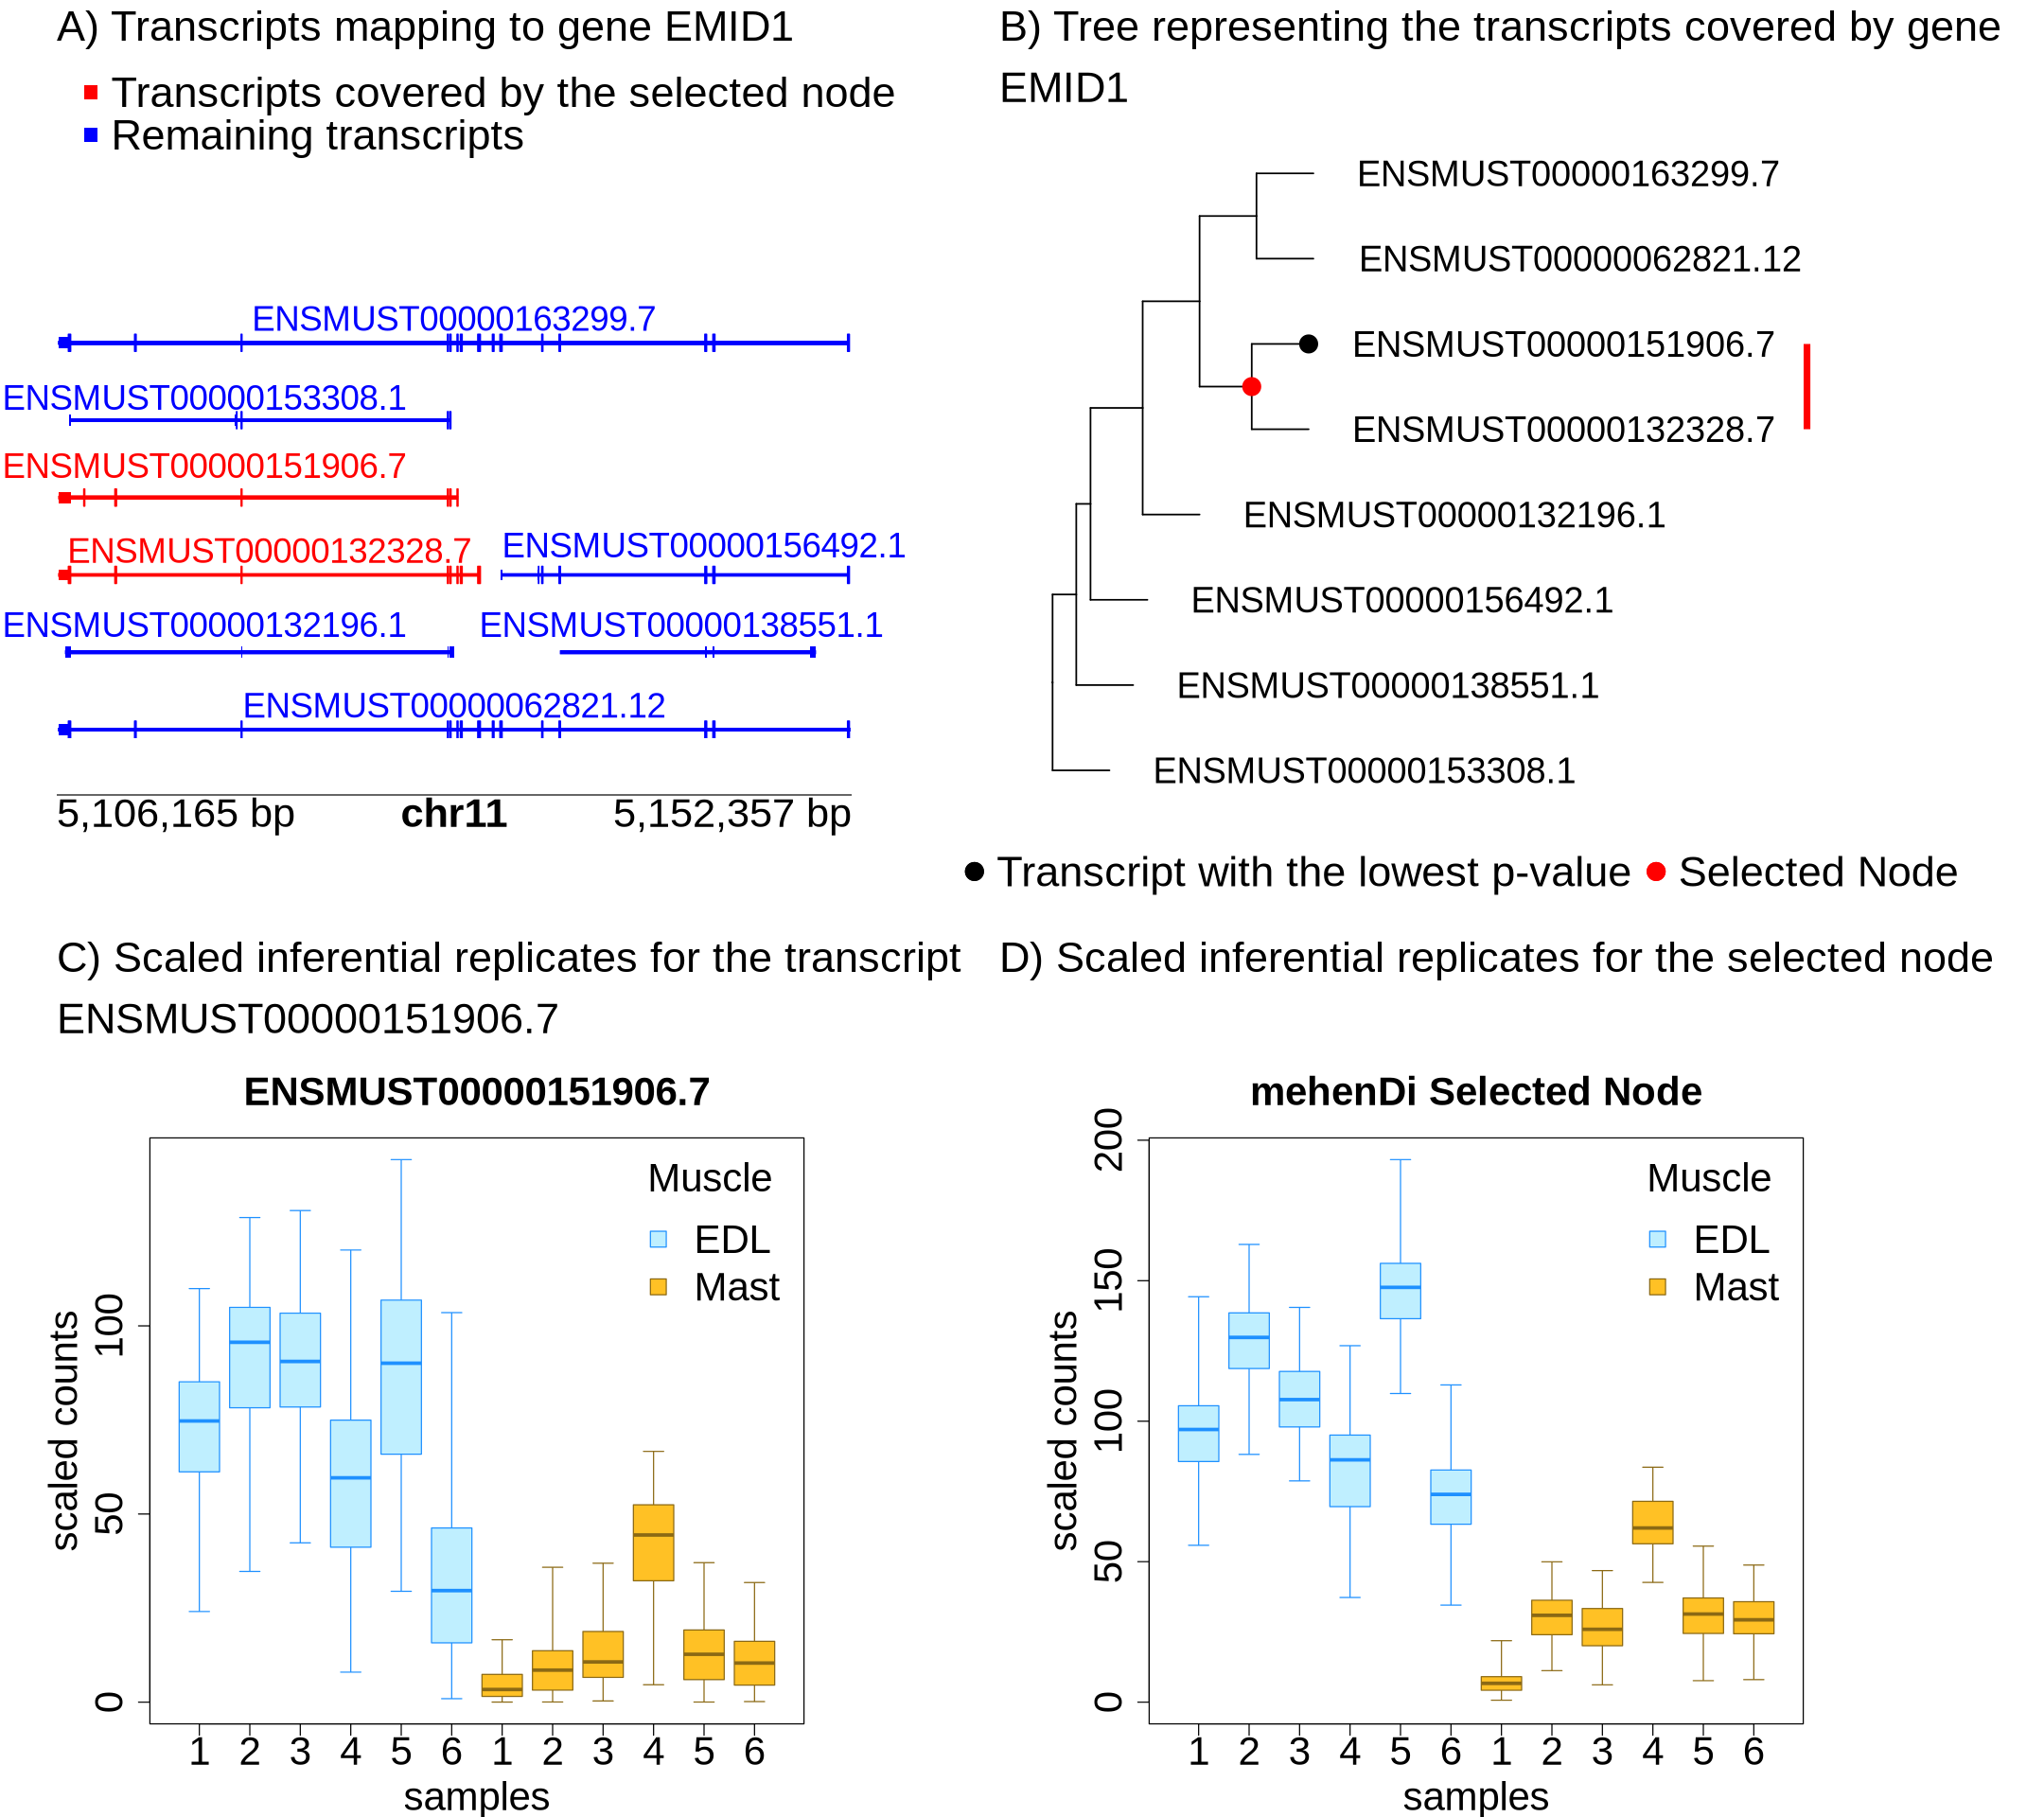

In [215]:
#137
options(repr.plot.width=18, repr.plot.height=16)
i <- 1
j <- 30

cex <- 2.1
size <- 22

tt <- extPreInf(tseCons, yTxps, mehenDiNodes, mehenDiDegNodes, txpMouse, genesMouse, i, j)
pI <- plotIReps(yAll, tt$txpMin, tt$iNode, lp="right", x="Muscle", cex=cex)
pTree <- plotTree(tt$tSub, 14, tt$minTInd, of=104, xlim=170, size = size+5, tip.size = 8)
pgs <- parF(tt$g, tt$txShow, tt$tSub, chromSt = 100, chromEnd = 100,fs=size)


pageCreate(width = 18, height = 16, showGuides = FALSE, default.units = "inches")
par <- pgs[[1]]

parText <- pgParams(
    just = c("left", "top"), fontsize = size+5
)#, fontface = "bold")
parTxp  <- pgParams(
    fontsize = size,
    fontcolor="blue"
)

parTxpR  <- pgParams(
    fontsize = size,
    fontcolor="red"
)

hilite <- pgs[[2]]
plotLegend(
    legend = c("Transcripts covered by the selected node", "Remaining transcripts"),
    fill = c("red", "blue"), border = FALSE,
    x = 0.5, y = 0.5, width = 1, height = 1,
    just = c("left", "top"), fontsize=size+5,
)
plotText(label="A) Transcripts mapping to gene EMID1", x = 0.5, y = 0.1,
        params = parText)

plotTranscripts(
    params = par, x = 0.5, y = 6.5, width = 7, height = 11, 
    spaceHeight=2.5, boxHeight=0.15,
    labels = "transcript", fill="blue", 
    transcriptHighlights = hilite
)


plotGenomeLabel(
  params = par, x = 0.5, y = 7, length=7,
  just = c("left", "top"), fontsize=size+4
)

plotText(label="B) Tree representing the transcripts covered by gene \nEMID1", 
         x = 8.8, y = 0.1, params = parText)
plotGG(
    plot = pTree,
    x = 8.8, y = 1, width = 8, height=7
)

plotText(label="C) Scaled inferential replicates for the transcript \nENSMUST00000151906.7", 
         x = 0.5, y = 8.3, params = parText)

plotGG(
    plot = pI[[1]],
    x = 0.5, y = 9.2, width = 7, height=7
)

plotText(label="D) Scaled inferential replicates for the selected node", 
         x = 8.8, y = 8.3, params = parText)

plotGG(
    plot = pI[[2]],
    x = 9.3, y = 9.2, width = 7, height=7
)

plotText(label="ENSMUST00000153308.1" , x = 1.8, y = 3.5,
        params = parTxp)
plotText(label="ENSMUST00000151906.7", x = 1.8, y = 4.1,
        params = parTxpR)
# plotText(label="ENSMUST00000132328.7" , x = 1.8, y = 4.8,
#         params = parTxpR)
plotText(label="ENSMUST00000156492.1", x = 6.2, y = 4.8,
        params = parTxp)
plotText(label="ENSMUST00000132196.1" , x = 1.8, y = 5.5,
        params = parTxp)
plotText(label="ENSMUST00000138551.1", x = 6, y = 5.5,
        params = parTxp)

In [124]:
options(repr.plot.width=20, repr.plot.height=16)

cex <- 2.1
size <- 24

i <- 1
j <- 239
pdf("../images/mouse/Figure9.pdf", width = 20, height = 16)
tt <- extPreInf(tseCons, yTxps, mehenDiNodes, mehenDiDegNodes, txpMouse, genesMouse, i, j)
pI <- plotIReps(yAll, tt$txpMin, tt$iNode, lp="left",cex = cex,x="Muscle")
pTree <- plotTree(tt$tSub, 16, tt$minTInd, of=118, xlim=180, size=size+5, tip.size = 9)
pgs <- parF(tt$g, tt$txShow, tt$tSub, chromSt = 100, chromEnd=100, fs=size)

library(plotgardener)
pageCreate(width = 20, height = 16, showGuides = FALSE, default.units = "inches")
par <- pgs[[1]]

parText <- pgParams(
    just = c("left", "top"), fontsize = size+5
)#, fontface = "bold")
parTxp  <- pgParams(
    fontsize = size,
    fontcolor="blue"
)

hilite <- pgs[[2]]
plotLegend(
    legend = c("Transcripts covered by the selected node", "Remaining transcripts"),
    fill = c("red", "blue"), border = FALSE,
    x = 0.5, y = 0.5, width = 1, height = 1,
    just = c("left", "top"), fontsize=size+5,
)
plotText(label="A) Transcripts mapping to gene TEC", x = 0.5, y = 0.1,
        params = parText)

plotTranscripts(
    params = par, x = 1.5, y = 6.8, width = 7.5, height = 7, 
    spaceHeight=2.5, boxHeight=0.15,
    labels = "transcript", fill="blue", 
    transcriptHighlights = hilite
)


plotGenomeLabel(
  params = par, x = 1.5, y = 7.2, length=8,
  just = c("left", "top"), fontsize=size+5
)

plotText(label="B) Tree representing the transcripts covered by gene \nTEC", 
         x = 10.5, y = 0.1, params = parText)
plotGG(
    plot = pTree,
    x = 10.5, y=1, width = 8.5, height=6
)

plotText(label="C) Scaled inferential replicates for the \ntranscript ENSMUST00000113594.7", 
         x = 0.5, y = 8.2, params = parText)

plotGG(
    plot = pI[[1]],
    x = 0.5, y = 9, width = 7, height=7
)

plotText(label="D) Scaled inferential replicates for the selected node", 
         x = 10.5, y = 8.2, params = parText)

plotGG(
    plot = pI[[2]],
    x = 11.5, y = 9, width = 7, height=7
)

plotText(label="ENSMUST00000155342.7" , x = 2, y = 2.4,
        params = parTxp)
plotText(label="ENSMUST00000150193.1", x = 6.1, y = 2.4,
        params = parTxp)
# plotText(label="ENSMUST00000202547.1", x = 5.2, y = 1.7,
#         params = parTxp)
dev.off()

[1] "ENSMUST00000113594.7"  "ENSMUST00000071944.12" "ENSMUST00000073843.12"

Phylogenetic tree with 9 tips and 8 internal nodes.

Tip labels:
  ENSMUST00000138842.7, ENSMUST00000155342.7, ENSMUST00000113594.7, ENSMUST00000071944.12, ENSMUST00000073843.12, ENSMUST00000126481.7, ...
Node labels:
  Node158359, Node158360, Node158361, Node158362, Node158363, Node158364, ...

Rooted; includes branch lengths.
[1] "Genes ENSMUSG00000029217"
               tx_name1                tx_name2                tx_name3 
"ENSMUST00000071944.12"  "ENSMUST00000113594.7"  "ENSMUST00000126481.7" 
               tx_name4                tx_name5                tx_name6 
 "ENSMUST00000155342.7" "ENSMUST00000073843.12"  "ENSMUST00000138842.7" 
               tx_name7                tx_name8                tx_name9 
 "ENSMUST00000149533.7"  "ENSMUST00000150193.1"  "ENSMUST00000202547.1" 
[1] "ENSMUST00000138842.7"  "ENSMUST00000155342.7"  "ENSMUST00000113594.7" 
[4] "ENSMUST00000071944.12" "ENSMUST00000073843.

legend[legend1]

text[text1]

transcripts[transcripts1]

genomeLabel[genomeLabel1]

text[text2]

Warning message:
"Removed 1 row containing missing values or values outside the scale range (`geom_text()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range (`geom_segment()`)."
gg[gg1]

text[text2]

gg[gg2]

text[text2]

gg[gg3]

text[text2]

text[text2]



png 
  2

[1] "ENSMUST00000113594.7"  "ENSMUST00000071944.12" "ENSMUST00000073843.12"

Phylogenetic tree with 9 tips and 8 internal nodes.

Tip labels:
  ENSMUST00000138842.7, ENSMUST00000155342.7, ENSMUST00000113594.7, ENSMUST00000071944.12, ENSMUST00000073843.12, ENSMUST00000126481.7, ...
Node labels:
  Node158359, Node158360, Node158361, Node158362, Node158363, Node158364, ...

Rooted; includes branch lengths.
[1] "Genes ENSMUSG00000029217"
               tx_name1                tx_name2                tx_name3 
"ENSMUST00000071944.12"  "ENSMUST00000113594.7"  "ENSMUST00000126481.7" 
               tx_name4                tx_name5                tx_name6 
 "ENSMUST00000155342.7" "ENSMUST00000073843.12"  "ENSMUST00000138842.7" 
               tx_name7                tx_name8                tx_name9 
 "ENSMUST00000149533.7"  "ENSMUST00000150193.1"  "ENSMUST00000202547.1" 
[1] "ENSMUST00000138842.7"  "ENSMUST00000155342.7"  "ENSMUST00000113594.7" 
[4] "ENSMUST00000071944.12" "ENSMUST00000073843.

legend[legend1]

text[text1]

transcripts[transcripts1]

genomeLabel[genomeLabel1]

text[text2]

Warning message:
"Removed 1 row containing missing values or values outside the scale range (`geom_text()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range (`geom_segment()`)."
gg[gg1]

text[text2]

gg[gg2]

text[text2]

gg[gg3]

text[text2]

text[text2]



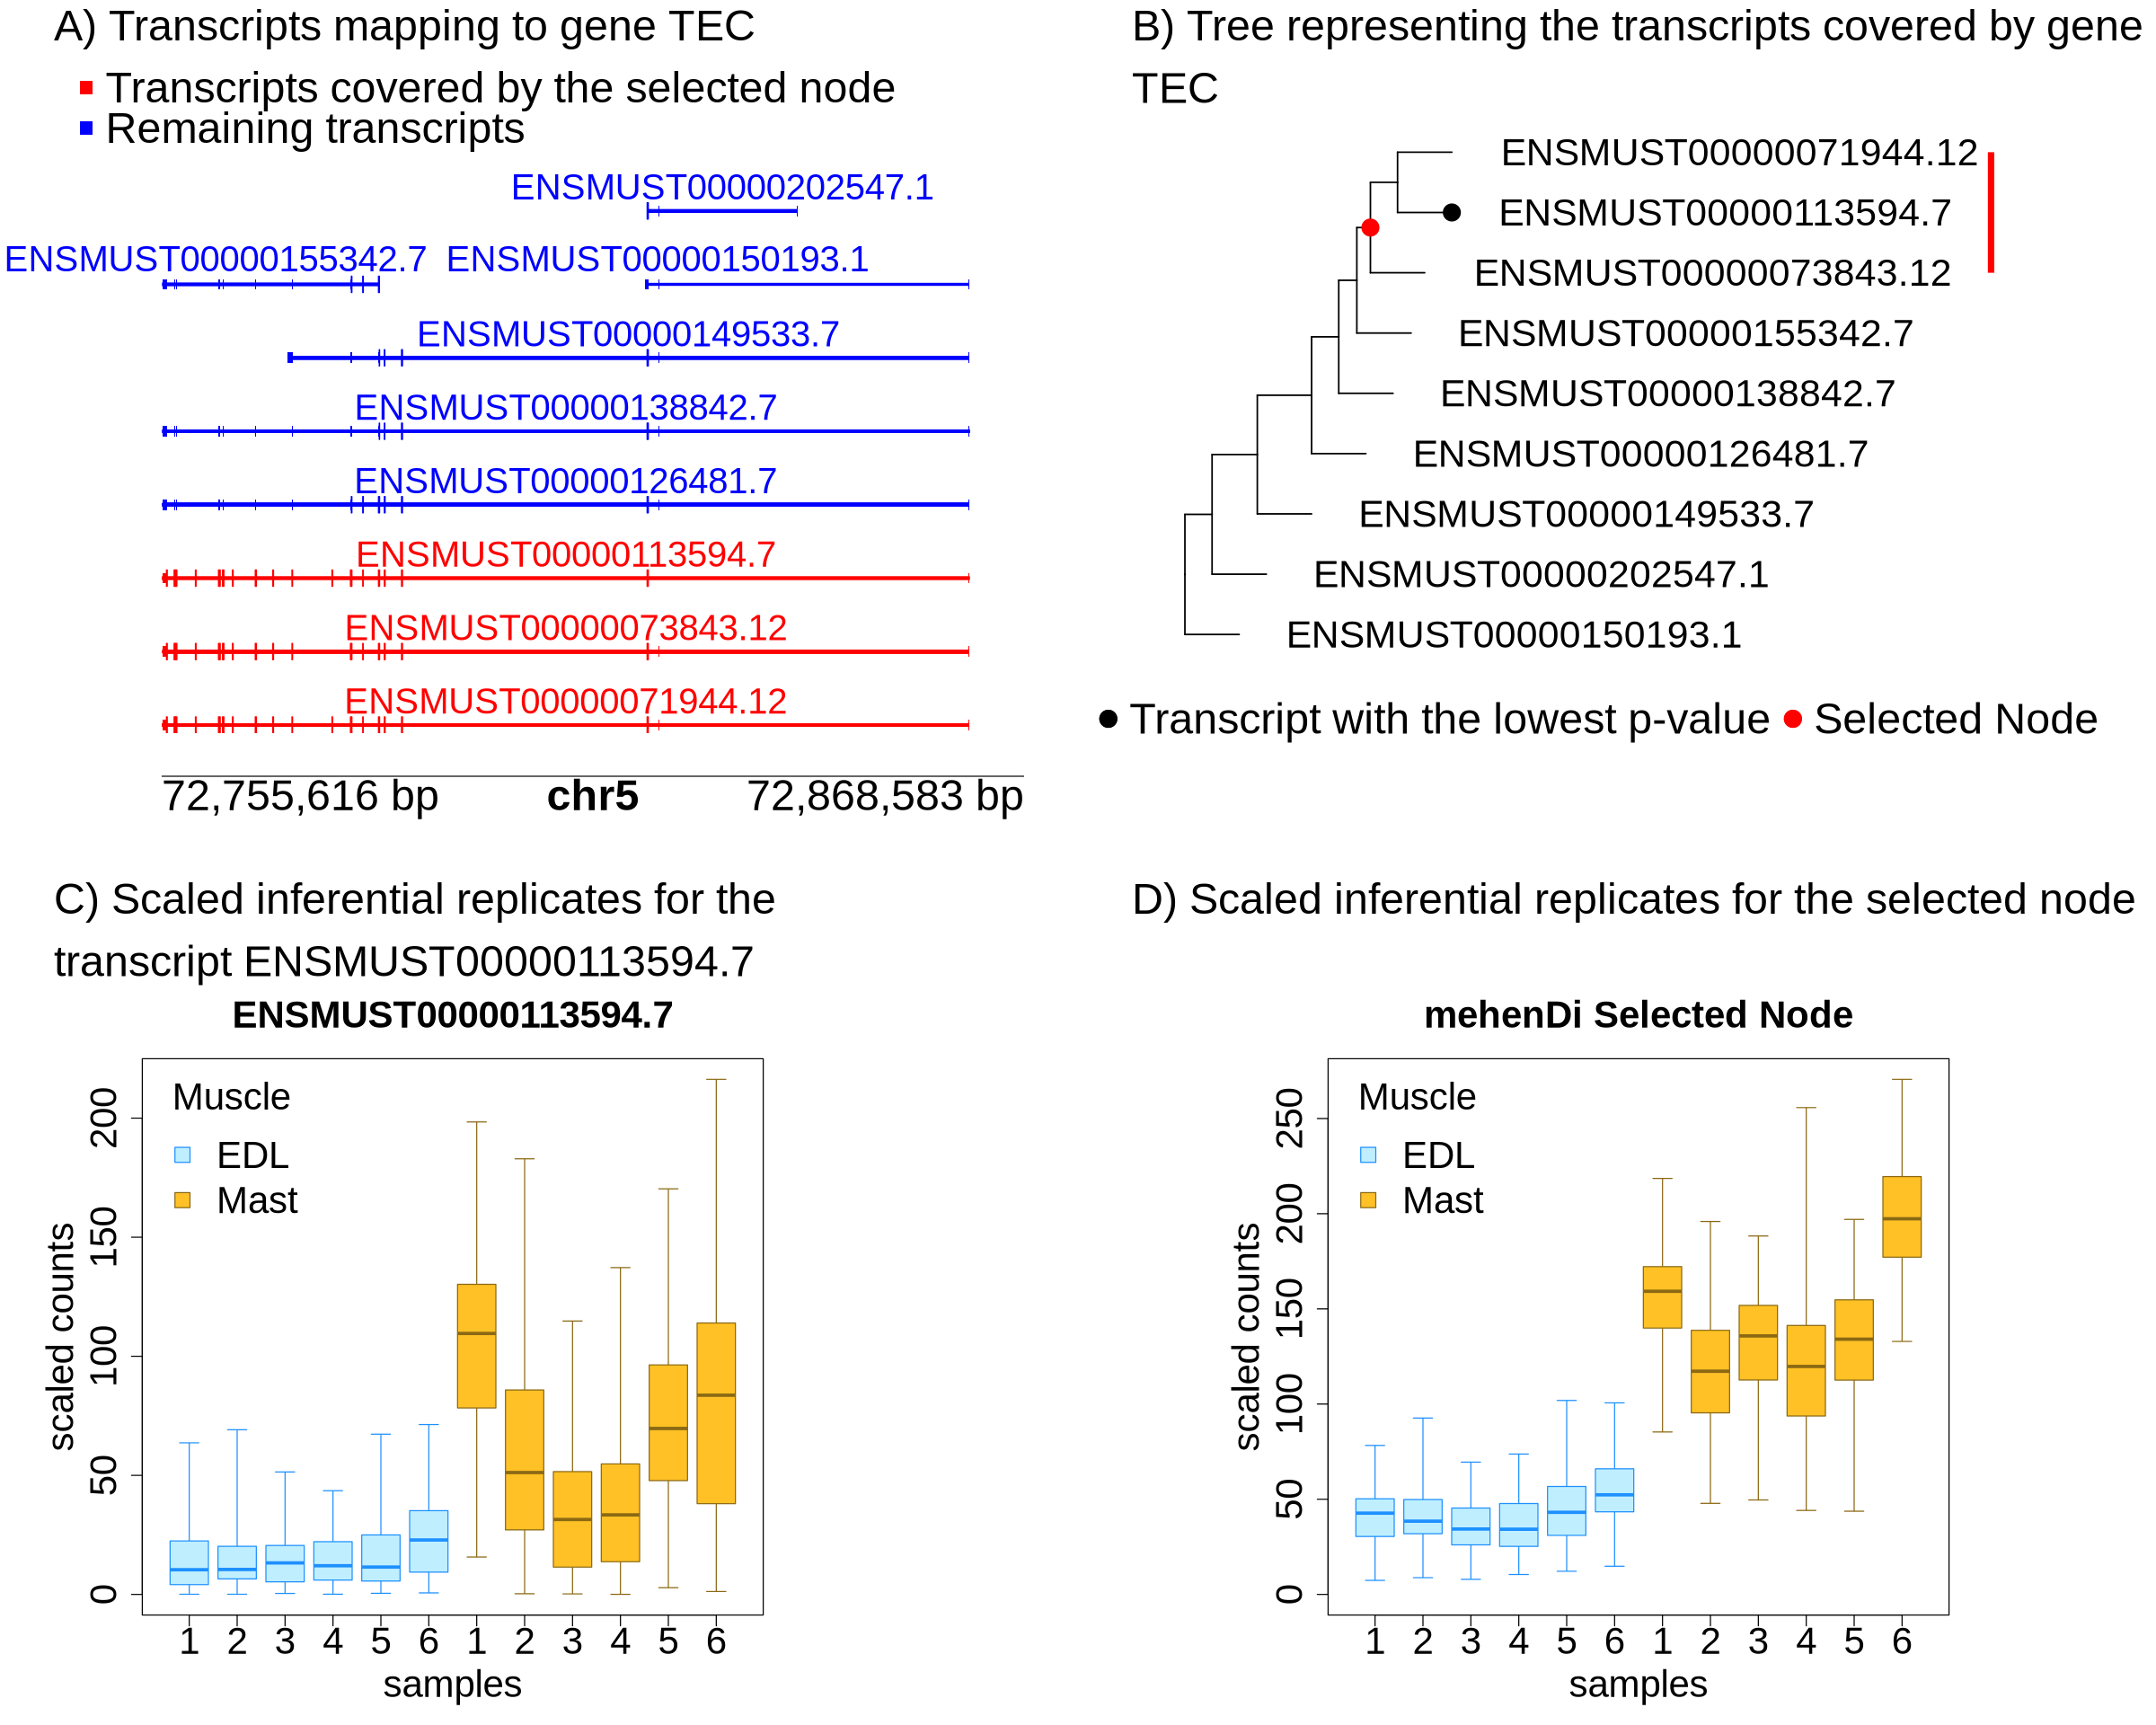

In [129]:
options(repr.plot.width=20, repr.plot.height=16)

cex <- 2.1
size <- 24

i <- 1
j <- 239

tt <- extPreInf(tseCons, yTxps, mehenDiNodes, mehenDiDegNodes, txpMouse, genesMouse, i, j)
pI <- plotIReps(yAll, tt$txpMin, tt$iNode, lp="left",cex = cex,x="Muscle")
pTree <- plotTree(tt$tSub, 16, tt$minTInd, of=118, xlim=180, size=size+5, tip.size = 9)
pgs <- parF(tt$g, tt$txShow, tt$tSub, chromSt = 100, chromEnd=100, fs=size)

library(plotgardener)
pageCreate(width = 20, height = 16, showGuides = FALSE, default.units = "inches")
par <- pgs[[1]]

parText <- pgParams(
    just = c("left", "top"), fontsize = size+5
)#, fontface = "bold")
parTxp  <- pgParams(
    fontsize = size,
    fontcolor="blue"
)

hilite <- pgs[[2]]
plotLegend(
    legend = c("Transcripts covered by the selected node", "Remaining transcripts"),
    fill = c("red", "blue"), border = FALSE,
    x = 0.5, y = 0.5, width = 1, height = 1,
    just = c("left", "top"), fontsize=size+5,
)
plotText(label="A) Transcripts mapping to gene TEC", x = 0.5, y = 0.1,
        params = parText)

plotTranscripts(
    params = par, x = 1.5, y = 6.8, width = 7.5, height = 7, 
    spaceHeight=2.5, boxHeight=0.15,
    labels = "transcript", fill="blue", 
    transcriptHighlights = hilite
)


plotGenomeLabel(
  params = par, x = 1.5, y = 7.2, length=8,
  just = c("left", "top"), fontsize=size+5
)

plotText(label="B) Tree representing the transcripts covered by gene \nTEC", 
         x = 10.5, y = 0.1, params = parText)
plotGG(
    plot = pTree,
    x = 10.5, y=1, width = 8.5, height=6
)

plotText(label="C) Scaled inferential replicates for the \ntranscript ENSMUST00000113594.7", 
         x = 0.5, y = 8.2, params = parText)

plotGG(
    plot = pI[[1]],
    x = 0.5, y = 9, width = 7, height=7
)

plotText(label="D) Scaled inferential replicates for the selected node", 
         x = 10.5, y = 8.2, params = parText)

plotGG(
    plot = pI[[2]],
    x = 11.5, y = 9, width = 7, height=7
)

plotText(label="ENSMUST00000155342.7" , x = 2, y = 2.4,
        params = parTxp)
plotText(label="ENSMUST00000150193.1", x = 6.1, y = 2.4,
        params = parTxp)
# plotText(label="ENSMUST00000202547.1", x = 5.2, y = 1.7,
#         params = parTxp)